In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Raw data file
file_to_load = "cdata.csv"

# Read purchasing file and store into pandas data frame
cdata0 = pd.read_csv(file_to_load)
cdata = cdata0.copy()

### (1)
Randomly select data points as the initialized centroids. 

By default, please set K=4. Report and 
plot  the  process  until  convergence.  The  centroids  also  need  to  be  plotted.

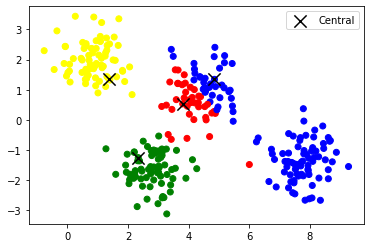

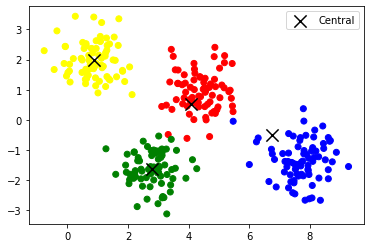

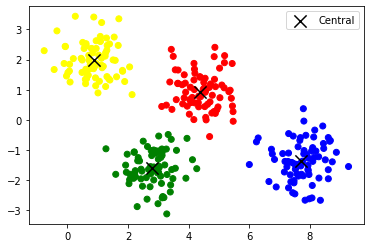

In [2]:
k=4
start_point = np.random.randint(0, 299, k)

x = np.array(cdata['x'][start_point])
y = np.array(cdata['y'][start_point])

colors = np.array(["red","green","blue","yellow","pink","orange","purple","beige","brown","gray","cyan","magenta"])
finish = False

while finish == False:
    
    distance_list = []
    for m in range(k):
        distance_list.append([(cdata['x'] - x[m])**2 + (cdata['y'] - y[m])**2])

    distance = pd.DataFrame(distance_list[0]).T
    for w in range(len(distance_list)):
        if w == 0:
            continue
        comb = pd.DataFrame(distance_list[w]).T
        distance = pd.concat([distance, comb], axis=1)

    distance.columns = range(k)    
    col = distance.idxmin(axis = 1)
    
    #new Central
    cen_x = []
    cen_y = []

    for i in  range(k):
        if sum(col == i) == 0:
            cen_x.append(x[i])
            cen_y.append(y[i])
            continue
        cen_x.append(cdata['x'][col == i].mean())
        cen_y.append(cdata['y'][col == i].mean())

    cen_x = np.array(cen_x)
    cen_y = np.array(cen_y)

    #decide finish or not
    if (cen_x == x).sum() == k:
        if (cen_y == y).sum() == k:
            finish = True
            break
    
    #plot
    plt.scatter(cdata['x'], cdata['y'], c=colors[col])
    plt.scatter(x, y, marker='x', c='black', s=150, label='Central')
    plt.legend(loc='upper right')

    plt.show( )
            
    x = cen_x
    y = cen_y
    

### (2) 
Re‐execute your K‐means clustering algorithm by changing K from 2 to 50 (from 2 to 10 is also okay). 

Plot the K value (x‐axis) vs. the value of Sum of Squared Error (SSE) (y‐axis).

Text(0, 0.5, 'Sum of Squared Error')

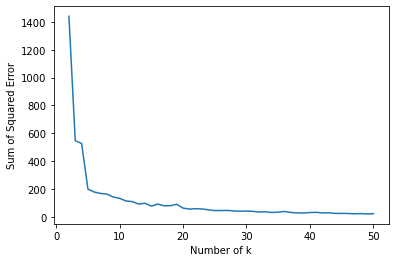

In [3]:
SSE = []

for k in range(2,51):
    start_point = np.random.randint(0, 299, k)

    x = np.array(cdata['x'][start_point])
    y = np.array(cdata['y'][start_point])

    finish = False

    while finish == False:
    
        distance_list = []
        for m in range(k):
            distance_list.append([(cdata['x'] - x[m])**2 + (cdata['y'] - y[m])**2 ])

        distance = pd.DataFrame(distance_list[0]).T
        for w in range(len(distance_list)):
            if w == 0:
                continue
            comb = pd.DataFrame(distance_list[w]).T
            distance = pd.concat([distance, comb], axis=1)

        distance.columns = range(k)    
        col = distance.idxmin(axis = 1)
    
        #new Central
        cen_x = []
        cen_y = []

        for i in  range(k):
            if sum(col == i) == 0:
                cen_x.append(x[i])
                cen_y.append(y[i])
                continue
            cen_x.append(cdata['x'][col == i].mean())
            cen_y.append(cdata['y'][col == i].mean())
    
        cen_x = np.array(cen_x)
        cen_y = np.array(cen_y)

        #decide finish or not
        if (cen_x == x).sum() == k:
            if (cen_y == y).sum() == k:
                finish = True
                break
                
        x = cen_x
        y = cen_y
    
    
    #SSE
    SSE_of_k = 0
    for i in range(len(col)):
        SSE_of_k += distance[col[i]][i]
    
    SSE.append(SSE_of_k)
    
    
    
plt.plot(range(2,51), SSE )
plt.xlabel('Number of k')
plt.ylabel('Sum of Squared Error')


### (3) 
Try 10 times of randomly initialized centroids, and plot their SSE values (y‐axis). 

Text(0.5, 1.0, 'Result of ten times randomly pick the initial points')

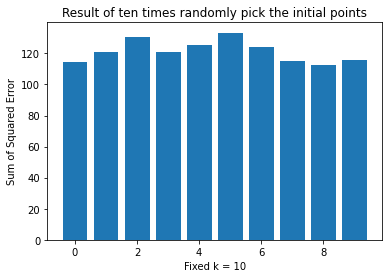

In [4]:
SSE = []

for times in range(0,10):
    k=10
    start_point = np.random.randint(0, 299, k)

    x = np.array(cdata['x'][start_point])
    y = np.array(cdata['y'][start_point])

    finish = False

    while finish == False:
    
        distance_list = []
        for m in range(k):
            distance_list.append([(cdata['x'] - x[m])**2 + (cdata['y'] - y[m])**2 ])

        distance = pd.DataFrame(distance_list[0]).T
        for w in range(len(distance_list)):
            if w == 0:
                continue
            comb = pd.DataFrame(distance_list[w]).T
            distance = pd.concat([distance, comb], axis=1)

        distance.columns = range(k)    
        col = distance.idxmin(axis = 1)
    
        #new Central
        cen_x = []
        cen_y = []

        for i in  range(k):
            if sum(col == i) == 0:
                cen_x.append(x[i])
                cen_y.append(y[i])
                continue
            cen_x.append(cdata['x'][col == i].mean())
            cen_y.append(cdata['y'][col == i].mean())
    
        cen_x = np.array(cen_x)
        cen_y = np.array(cen_y)

        #decide finish or not
        if (cen_x == x).sum() == k:
            if (cen_y == y).sum() == k:
                finish = True
                break
                
        x = cen_x
        y = cen_y
    
    
    #SSE
    SSE_of_k = 0
    for i in range(len(col)):
        SSE_of_k += distance[col[i]][i]
    
    SSE.append(SSE_of_k)
    
    
plt.bar(range(0,10),SSE)
plt.xlabel('Fixed k = 10')
plt.ylabel('Sum of Squared Error')
plt.title('Result of ten times randomly pick the initial points')  